## Use the diabetes data set from UCI and Pima Indians Diabetes data set for performing the following:

##### a. Univariate analysis: Frequency, Mean, Median, Mode, Variance, Standard Deviation, Skewness and Kurtosis
##### b. Bivariate analysis: Linear and logistic regression modeling
##### c. Multiple Regression analysis
##### d. Also compare the results of the above analysis for the two data sets
Dataset link: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats as st


In [ ]:
data =pd.read_csv('diabetes.csv')

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.shape

(768, 9)

In [ ]:
print(data['Glucose'].value_counts())

99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
st.mode(data)

C:\Users\suyas\AppData\Local\Temp\ipykernel_8888\1907925539.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  st.mode(data)


ModeResult(mode=array([[ 1.   , 99.   , 70.   ,  0.   ,  0.   , 32.   ,  0.254, 22.   ,
         0.   ]]), count=array([[135,  17,  57, 227, 374,  13,   6,  72, 500]]))

In [ ]:
st.skew(data)

array([ 0.89991194,  0.17341396, -1.84000523,  0.10915876,  2.26781046,
       -0.42814328,  1.9161592 ,  1.12738926,  0.6337757 ])

In [ ]:
st.kurtosis(data)

array([ 0.15038274,  0.62881333,  5.13869066, -0.52449449,  7.15957492,
        3.26125742,  5.55079205,  0.63117694, -1.59832836])

In [ ]:
np.var(data)

Pregnancies                    11.339272
Glucose                      1020.917262
BloodPressure                 374.159449
SkinThickness                 254.141900
Insulin                     13263.886875
BMI                            62.079046
DiabetesPedigreeFunction        0.109636
Age                           138.122964
Outcome                         0.227186
dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x = data.drop('Outcome',axis=1)
y= data['Outcome']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
lr = LinearRegression()
temp = lr.fit(x_train,y_train)

In [ ]:
lr.score(x_test,y_test)

0.3463655546089657

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x = data.drop('Outcome',axis=1)
y= data['Outcome']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
lor = LogisticRegression()
temp = lor.fit(x_train,y_train)

In [ ]:
lor.score(x_test,y_test)

0.7835497835497836

In [ ]:
from sklearn.metrics import classification_report

preds = lor.predict(x_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

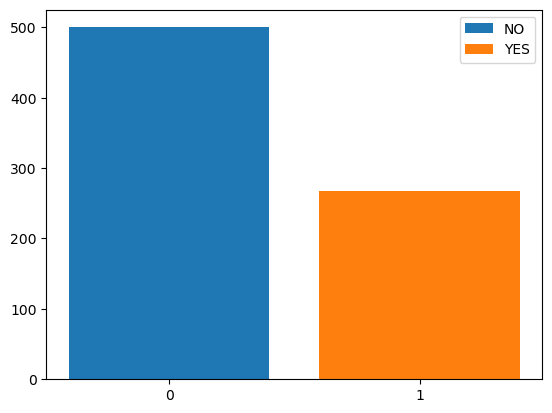

In [ ]:
plt.bar(0,y.value_counts()[0],label="NO")
plt.bar(1,y.value_counts()[1],label="YES")
plt.legend()
plt.xticks([0,1]);

<Axes: xlabel='BloodPressure', ylabel='count'>

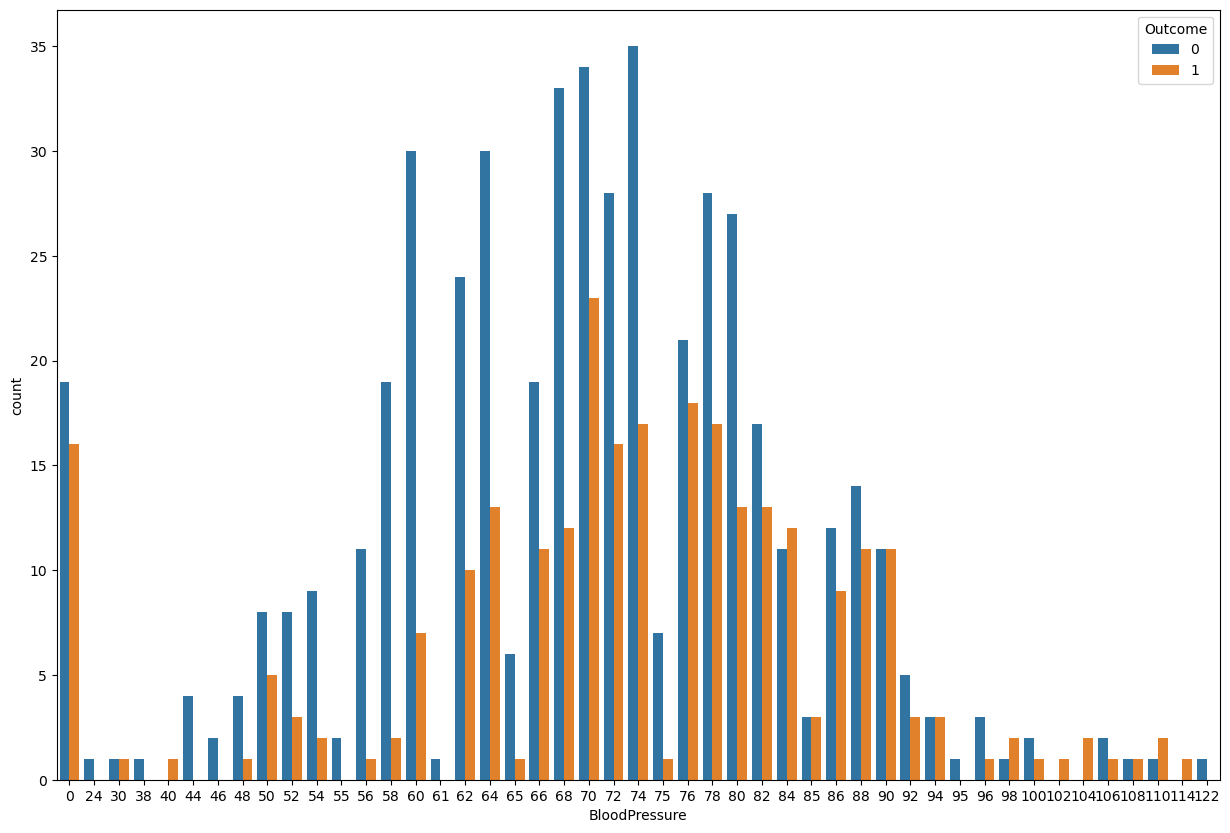

In [ ]:
fig, axes = plt.subplots(figsize=(15,10))
sns.countplot(x='BloodPressure', data=data, hue='Outcome',ax=axes)
